# 🔥❄️ Projet : Prédiction de l’Efficacité Énergétique des Bâtiments
Ce notebook applique deux techniques de régression (ELM & BP) sur un dataset énergétique.
Objectif : prédire les charges de chauffage (Y1) et de refroidissement (Y2).

## 📦 Importation des Bibliothèques


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge
import warnings
warnings.filterwarnings('ignore')

## 📂 Chargement des Données


In [2]:
#Chargement de dataset
df = pd.read_excel(r"C:\Users\khadi\OneDrive\Bureau\Reseau de neuronnes\energy+efficiency\ENB2012_data.xlsx")
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


## 🧼 Prétraitement des Données


In [3]:
#Afficher les noms de colonnes d'origine
print("Colonnes originales :", df.columns.tolist())

Colonnes originales : ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2']


In [4]:
#Renommer les colonnes pour plus de clarté
df.columns = [
    "Relative_Compactness",        # X1
    "Surface_Area",                # X2
    "Wall_Area",                   # X3
    "Roof_Area",                   # X4
    "Overall_Height",              # X5
    "Orientation",                 # X6
    "Glazing_Area",                # X7
    "Glazing_Area_Distribution",  # X8
    "Heating_Load",                # Y1
    "Cooling_Load"                 # Y2
]
# Vérifier les nouveaux noms
print("Nouvelles colonnes :", df.columns.tolist())

Nouvelles colonnes : ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load']


In [5]:
# Sauvegarder le dataset nettoyé 
df.to_csv("ENB2012_data_clean.csv", index=False)

In [6]:
# Chargement des données nettoyés
df = pd.read_csv('ENB2012_data_clean.csv')
df

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [7]:
# Statistiques de base
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [8]:
df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [9]:
df.duplicated() #pour determiner si la ligne est répétée ou non 

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [10]:
df.isna().sum() #pour afficher les valeurs nulls

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

## 📊 Exploration des Données (EDA)


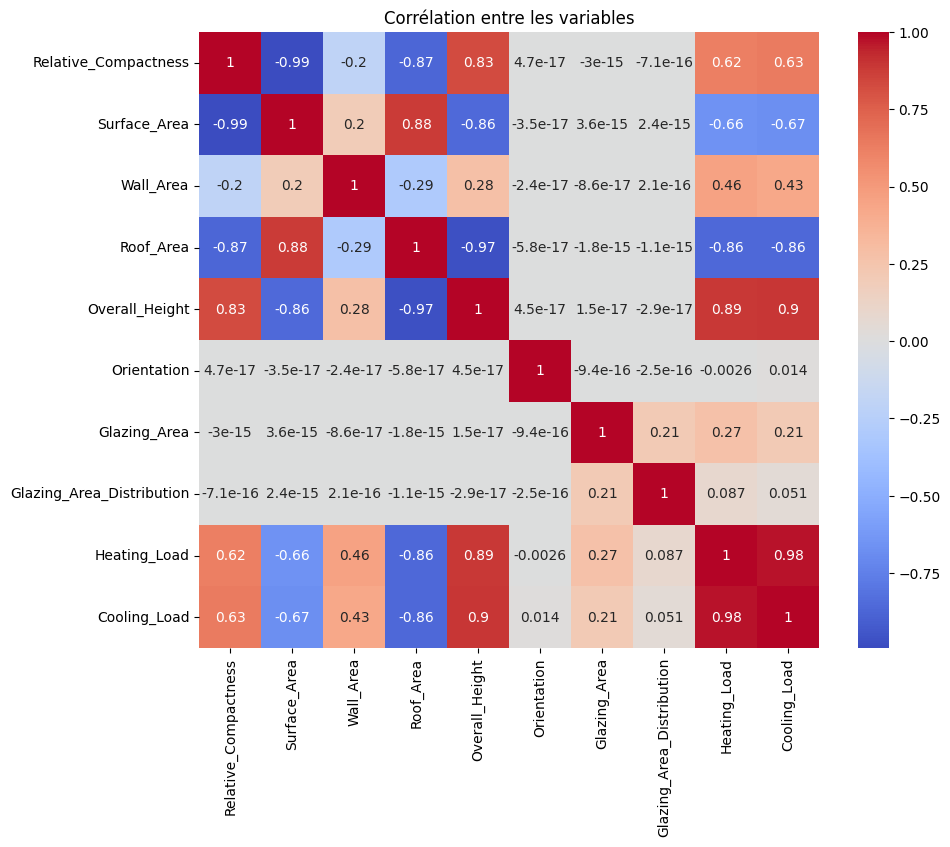

In [11]:
# 🔥 Corrélation: Voir quelles colonnes influencent Y1 et Y2.
#Overall_Height est fortement corrélée avec Heating_Load.
#C’est utile pour :Sélectionner les bonnes features et Comprendre les liens entre variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Corrélation entre les variables")
plt.show()

## ✂️ Séparation & ⚖️ Normalisation des Données


In [12]:
#70 % des données servent à entraîner les modèles (les apprendre)
#30 % servent à tester leur performance sur des données jamais vues
X = df.drop(columns=['Heating_Load', 'Cooling_Load'])
y1 = df['Heating_Load']
y2 = df['Cooling_Load']
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.3, random_state=42)
_, _, y2_train, y2_test = train_test_split(X, y2, test_size=0.3, random_state=42)
#But : Mettre toutes les données sur la même échelle (moyenne 0, écart-type 1)
#Pourquoi ? Parce que : Les réseaux de neurones sont sensibles aux grandes différences de valeur Sans ça, l’apprentissage peut être faussé
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## ⚡ Modélisation avec Extreme Learning Machine (ELM)


In [13]:
# --- 1. Définir la fonction de Grid Search pour ELM ---
def grid_search_elm(X_train, y_train, X_test, y_test, activations, hidden_sizes):
    """
    Boucle sur fonctions d'activation et tailles cachées,
    entraîne un ELM + Ridge et retourne un DataFrame des performances.
    """
    records = []
    for name, act in activations.items():
        for n_hidden in hidden_sizes:
            # Génération des poids et biais aléatoires
            rng = np.random.RandomState(42)
            W = rng.normal(size=(X_train.shape[1], n_hidden))
            b = rng.normal(size=(n_hidden,))
            # Calcul de la couche cachée
            H_train = act(np.dot(X_train, W) + b)
            H_test  = act(np.dot(X_test,  W) + b)
            # Entraînement du Ridge
            model = Ridge(alpha=1.0)
            model.fit(H_train, y_train)
            # Prédictions
            y_pred = model.predict(H_test)
            # Mesure des métriques
            mae  = mean_absolute_error(y_test, y_pred)
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            r2   = r2_score(y_test, y_pred)
            # Stockage des résultats
            records.append({
                'act': name,
                'n_hidden': n_hidden,
                'MAE': round(mae, 4),
                'RMSE': round(rmse, 4),
                'R2': round(r2, 4)
            })
    return pd.DataFrame(records)

# --- 2. Paramètres de la recherche ---
activations = {
    'tanh': np.tanh,
    'relu': lambda x: np.maximum(0, x),
    'sigmoid': lambda x: 1/(1+np.exp(-x)),
    'linear': lambda x: x
}
hidden_sizes = [50, 100, 200]

# --- 3. Lancer la recherche pour Y1 et Y2 ---
results_y1 = grid_search_elm(X_train_scaled, y1_train, X_test_scaled, y1_test, activations, hidden_sizes)
results_y2 = grid_search_elm(X_train_scaled, y2_train, X_test_scaled, y2_test, activations, hidden_sizes)

# --- Afficher tous les résultats ---
print("=== Performances ELM pour Y1 ===")
print(results_y1.to_string(index=False))
print("\n=== Performances ELM pour Y2 ===")
print(results_y2.to_string(index=False))

# --- 4. Sélection des meilleurs ELM ---
best_y1 = results_y1.loc[results_y1['RMSE'].idxmin()]
best_y2 = results_y2.loc[results_y2['RMSE'].idxmin()]

print("\n=== Meilleurs ELM ===")
print(f"Y1 -> Activation: {best_y1['act']}, Neurones: {best_y1['n_hidden']}, RMSE: {best_y1['RMSE']}, MAE: {best_y1['MAE']}, R2: {best_y1['R2']}")
print(f"Y2 -> Activation: {best_y2['act']}, Neurones: {best_y2['n_hidden']}, RMSE: {best_y2['RMSE']}, MAE: {best_y2['MAE']}, R2: {best_y2['R2']}")

=== Performances ELM pour Y1 ===
    act  n_hidden    MAE   RMSE     R2
   tanh        50 2.0449 2.7895 0.9233
   tanh       100 1.7369 2.3195 0.9469
   tanh       200 1.3944 1.7112 0.9711
   relu        50 1.9482 2.6139 0.9326
   relu       100 1.6989 2.1899 0.9527
   relu       200 1.7992 2.3539 0.9454
sigmoid        50 1.9672 2.7531 0.9252
sigmoid       100 1.7462 2.4277 0.9419
sigmoid       200 1.5129 2.0336 0.9592
 linear        50 2.1550 2.9732 0.9128
 linear       100 2.1551 2.9732 0.9128
 linear       200 2.1551 2.9731 0.9128

=== Performances ELM pour Y2 ===
    act  n_hidden    MAE   RMSE     R2
   tanh        50 2.3113 3.1584 0.8893
   tanh       100 1.9698 2.6327 0.9231
   tanh       200 1.7988 2.3455 0.9390
   relu        50 2.2495 3.0266 0.8984
   relu       100 2.0367 2.6178 0.9240
   relu       200 2.0367 2.7092 0.9186
sigmoid        50 2.1830 3.0043 0.8999
sigmoid       100 1.9570 2.7805 0.9142
sigmoid       200 1.8026 2.4893 0.9313
 linear        50 2.2578 3.2054 0.88

## ELM FROM SCRATCH

In [14]:
# -------------------- Fonctions ELM --------------------
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def linear(x):
    return x

# Dictionnaire pour accéder facilement aux fonctions
activation_functions = {
    'sigmoid': sigmoid,
    'tanh': tanh,
    'relu': relu,
    'linear': linear
}

def train_elm(X, Y, num_hidden_neurons, activation_name):
    W = np.random.randn(X.shape[1], num_hidden_neurons)
    b = np.random.randn(num_hidden_neurons)
    act_func = activation_functions[activation_name]
    H = act_func(np.dot(X, W) + b)
    beta = np.dot(np.linalg.pinv(H), Y)
    return W, b, beta, act_func

def predict_elm(X, W, b, beta, act_func):
    H = act_func(np.dot(X, W) + b)
    return np.dot(H, beta)

# -------------------- Normalisation des cibles --------------------
scaler_y1 = StandardScaler()
scaler_y2 = StandardScaler()

y1_train_scaled = scaler_y1.fit_transform(y1_train.values.reshape(-1, 1))
y1_test_scaled = scaler_y1.transform(y1_test.values.reshape(-1, 1))

y2_train_scaled = scaler_y2.fit_transform(y2_train.values.reshape(-1, 1))
y2_test_scaled = scaler_y2.transform(y2_test.values.reshape(-1, 1))

# -------------------- Test de plusieurs activations + architectures --------------------
architectures = [50, 100, 200]
activations = ['tanh', 'relu', 'sigmoid', 'linear']

results_y1 = []
results_y2 = []

np.random.seed(42)  # reproductibilité

for act in activations:
    for neurons in architectures:
        # --- Y1 ---
        W1, b1, beta1, act_func1 = train_elm(X_train_scaled, y1_train_scaled, neurons, act)
        y1_pred_scaled = predict_elm(X_test_scaled, W1, b1, beta1, act_func1)
        y1_pred = scaler_y1.inverse_transform(y1_pred_scaled)#denormalisation
        y1_true = scaler_y1.inverse_transform(y1_test_scaled)

        mae1 = mean_absolute_error(y1_true, y1_pred)
        rmse1 = np.sqrt(mean_squared_error(y1_true, y1_pred))
        r2_1 = r2_score(y1_true, y1_pred)
        results_y1.append((act, neurons, mae1, rmse1, r2_1))

        # --- Y2 ---
        W2, b2, beta2, act_func2 = train_elm(X_train_scaled, y2_train_scaled, neurons, act)
        y2_pred_scaled = predict_elm(X_test_scaled, W2, b2, beta2, act_func2)
        y2_pred = scaler_y2.inverse_transform(y2_pred_scaled)
        y2_true = scaler_y2.inverse_transform(y2_test_scaled)

        mae2 = mean_absolute_error(y2_true, y2_pred)
        rmse2 = np.sqrt(mean_squared_error(y2_true, y2_pred))
        r2_2 = r2_score(y2_true, y2_pred)
        results_y2.append((act, neurons, mae2, rmse2, r2_2))
elm_records = []

# Résultats ELM pour Y1
for res in results_y1:
    if isinstance(res, tuple) and len(res) == 5:
        act, neurons, mae, rmse, r2 = res
        elm_records.append({
            'target': 'Y1',
            'arch': neurons,
            'act': act,
            'MAE': round(mae, 4),
            'RMSE': round(rmse, 4),
            'R2': round(r2, 4)
        })

# Résultats ELM pour Y2
for res in results_y2:
    if isinstance(res, tuple) and len(res) == 5:
        act, neurons, mae, rmse, r2 = res
        elm_records.append({
            'target': 'Y2',
            'arch': neurons,
            'act': act,
            'MAE': round(mae, 4),
            'RMSE': round(rmse, 4),
            'R2': round(r2, 4)
        })

# Créer le DataFrame elm_df
elm_df = pd.DataFrame(elm_records)        

# -------------------- Affichage --------------------
print("\n=== Performances ELM pour Y1 ===")
print(f"{'act':>8} {'n_hidden':>8} {'MAE':>8} {'RMSE':>8} {'R2':>8}")
for res in results_y1:
    print(f"{res[0]:>8} {res[1]:>8} {res[2]:8.4f} {res[3]:8.4f} {res[4]:8.4f}")

print("\n=== Performances ELM pour Y2 ===")
print(f"{'act':>8} {'n_hidden':>8} {'MAE':>8} {'RMSE':>8} {'R2':>8}")
for res in results_y2:
    print(f"{res[0]:>8} {res[1]:>8} {res[2]:8.4f} {res[3]:8.4f} {res[4]:8.4f}")

# -------------------- Meilleures architectures --------------------
best_y1 = min(results_y1, key=lambda x: x[2])  # meilleur MAE
best_y2 = min(results_y2, key=lambda x: x[2])

print("\n=== Meilleurs ELM ===")
print(f"Y1 -> Activation: {best_y1[0]}, Neurones: {best_y1[1]}, RMSE: {best_y1[3]:.4f}, MAE: {best_y1[2]:.4f}, R2: {best_y1[4]:.4f}")
print(f"Y2 -> Activation: {best_y2[0]}, Neurones: {best_y2[1]}, RMSE: {best_y2[3]:.4f}, MAE: {best_y2[2]:.4f}, R2: {best_y2[4]:.4f}")



=== Performances ELM pour Y1 ===
     act n_hidden      MAE     RMSE       R2
    tanh       50   2.0677   2.7937   0.9230
    tanh      100   1.9801   2.5521   0.9358
    tanh      200   1.3910   1.8455   0.9664
    relu       50   1.8197   2.4490   0.9409
    relu      100   2.0605   2.6066   0.9330
    relu      200   1.8237   3.6522   0.8685
 sigmoid       50   2.0104   2.6646   0.9300
 sigmoid      100   1.8717   2.4722   0.9397
 sigmoid      200   1.0111   1.3112   0.9830
  linear       50   2.1552   2.9731   0.9128
  linear      100   2.1552   2.9731   0.9128
  linear      200   2.1552   2.9731   0.9128

=== Performances ELM pour Y2 ===
     act n_hidden      MAE     RMSE       R2
    tanh       50   1.9897   2.6953   0.9194
    tanh      100   2.3777   3.0718   0.8953
    tanh      200   2.0716   2.7905   0.9136
    relu       50   2.3439   3.1922   0.8869
    relu      100   1.9870   2.6507   0.9220
    relu      200   1.8304   2.3066   0.9410
 sigmoid       50   2.0995   2.8

## Visualisation des performances ELM

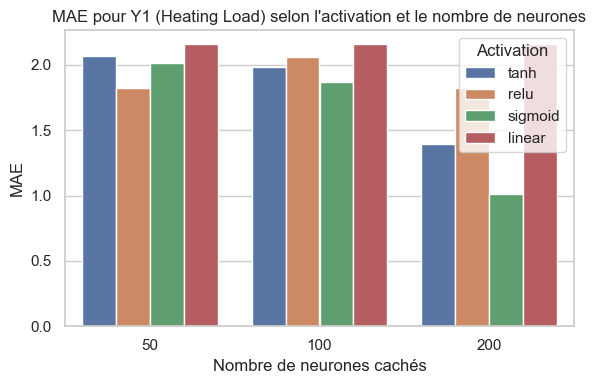

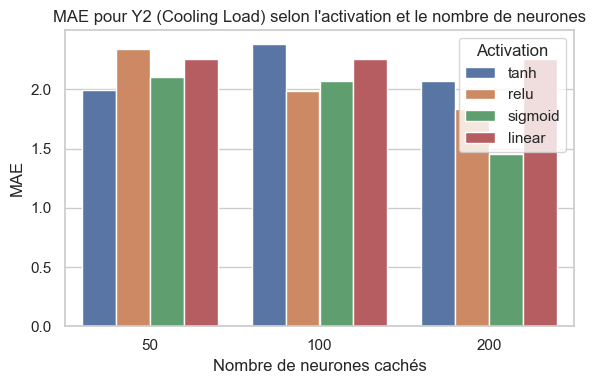

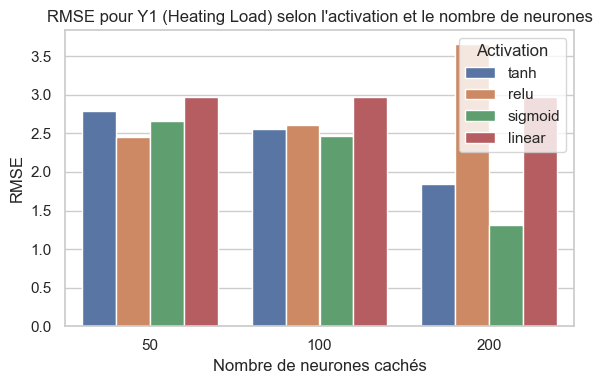

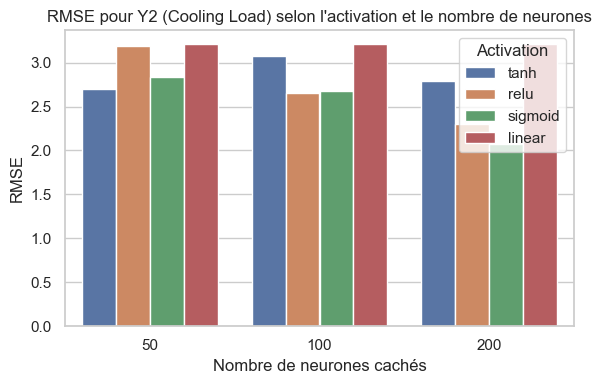

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pour des plots plus jolis
sns.set(style="whitegrid")

# --- Transformation des résultats en DataFrame pour plus de facilité ---
import pandas as pd

df_y1 = pd.DataFrame(results_y1, columns=["activation", "n_hidden", "MAE", "RMSE", "R2"])
df_y2 = pd.DataFrame(results_y2, columns=["activation", "n_hidden", "MAE", "RMSE", "R2"])

# --- Barplot pour Y1 (Heating_Load) ---
plt.figure(figsize=(6, 4))
sns.barplot(data=df_y1, x="n_hidden", y="MAE", hue="activation")
plt.title("MAE pour Y1 (Heating Load) selon l'activation et le nombre de neurones")
plt.ylabel("MAE")
plt.xlabel("Nombre de neurones cachés")
plt.legend(title="Activation")
plt.tight_layout()
plt.show()

# --- Barplot pour Y2 (Cooling_Load) ---
plt.figure(figsize=(6, 4))
sns.barplot(data=df_y2, x="n_hidden", y="MAE", hue="activation")
plt.title("MAE pour Y2 (Cooling Load) selon l'activation et le nombre de neurones")
plt.ylabel("MAE")
plt.xlabel("Nombre de neurones cachés")
plt.legend(title="Activation")
plt.tight_layout()
plt.show()

# --- (optionnel) RMSE pour Y1 ---
plt.figure(figsize=(6, 4))
sns.barplot(data=df_y1, x="n_hidden", y="RMSE", hue="activation")
plt.title("RMSE pour Y1 (Heating Load) selon l'activation et le nombre de neurones")
plt.ylabel("RMSE")
plt.xlabel("Nombre de neurones cachés")
plt.legend(title="Activation")
plt.tight_layout()
plt.show()

# --- (optionnel) RMSE pour Y2 ---
plt.figure(figsize=(6, 4))
sns.barplot(data=df_y2, x="n_hidden", y="RMSE", hue="activation")
plt.title("RMSE pour Y2 (Cooling Load) selon l'activation et le nombre de neurones")
plt.ylabel("RMSE")
plt.xlabel("Nombre de neurones cachés")
plt.legend(title="Activation")
plt.tight_layout()
plt.show()


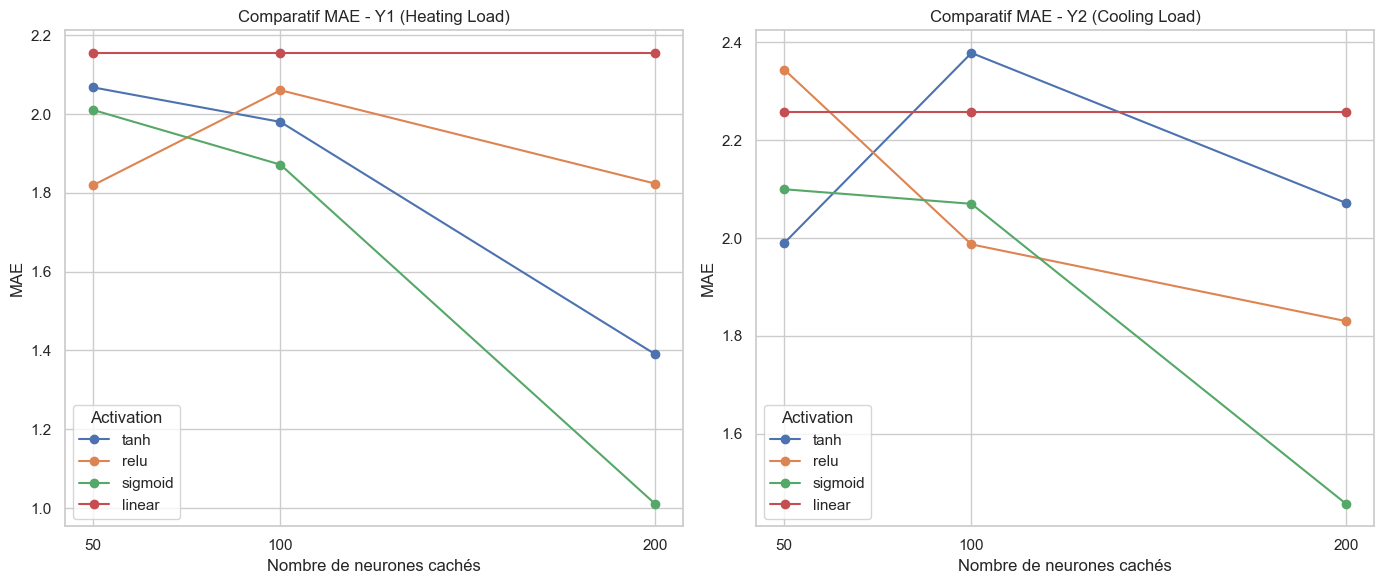

In [16]:
# --- Comparatif combiné MAE pour Y1 et Y2 ---
plt.figure(figsize=(14, 6))

# --- Y1 Heating Load ---
plt.subplot(1, 2, 1)
for act in df_y1['activation'].unique():
    subset = df_y1[df_y1['activation'] == act]
    plt.plot(subset['n_hidden'], subset['MAE'], marker='o', label=act)

plt.title('Comparatif MAE - Y1 (Heating Load)')
plt.xlabel('Nombre de neurones cachés')
plt.ylabel('MAE')
plt.xticks([50, 100, 200])
plt.legend(title='Activation')
plt.grid(True)

# --- Y2 Cooling Load ---
plt.subplot(1, 2, 2)
for act in df_y2['activation'].unique():
    subset = df_y2[df_y2['activation'] == act]
    plt.plot(subset['n_hidden'], subset['MAE'], marker='o', label=act)

plt.title('Comparatif MAE - Y2 (Cooling Load)')
plt.xlabel('Nombre de neurones cachés')
plt.ylabel('MAE')
plt.xticks([50, 100, 200])
plt.legend(title='Activation')
plt.grid(True)

plt.tight_layout()
plt.show()


## 🤖 Modélisation avec Backpropagation (MLPRegressor)

In [17]:
# --- 5. Grid Search pour MLPRegressor (BP) ---
bp_records = []
hidden_configs = [(50,), (100,), (50,50)]
activ_bp = ['relu', 'tanh', 'logistic']
for config in hidden_configs:
    for act in activ_bp:
        model = MLPRegressor(hidden_layer_sizes=config, activation=act, max_iter=1000, random_state=1)
        # Y1
        model.fit(X_train_scaled, y1_train)
        y1_pred = model.predict(X_test_scaled)
        bp_records.append({'target':'Y1','arch':config,'act':act,
                           'MAE': round(mean_absolute_error(y1_test,y1_pred),4),
                           'RMSE': round(mean_squared_error(y1_test,y1_pred,squared=False),4),
                           'R2': round(r2_score(y1_test,y1_pred),4)})
        # Y2
        model.fit(X_train_scaled, y2_train)
        y2_pred = model.predict(X_test_scaled)
        bp_records.append({'target':'Y2','arch':config,'act':act,
                           'MAE': round(mean_absolute_error(y2_test,y2_pred),4),
                           'RMSE': round(mean_squared_error(y2_test,y2_pred,squared=False),4),
                           'R2': round(r2_score(y2_test,y2_pred),4)})#stocker les resultats dans une liste
bp_df = pd.DataFrame(bp_records)
# -------------------- Séparer les résultats BP --------------------
bp_df_y1 = bp_df[bp_df['target'] == 'Y1'].copy()
bp_df_y2 = bp_df[bp_df['target'] == 'Y2'].copy()

# -------------------- Affichage des performances BP --------------------
print("\n=== Performances BP pour Y1 ===")
print(f"{'act':>8} {'arch':>10} {'MAE':>8} {'RMSE':>8} {'R2':>8}")
for _, row in bp_df_y1.iterrows():
    arch_str = str(row['arch'])
    print(f"{row['act']:>8} {arch_str:>10} {row['MAE']:8.4f} {row['RMSE']:8.4f} {row['R2']:8.4f}")

print("\n=== Performances BP pour Y2 ===")
print(f"{'act':>8} {'arch':>10} {'MAE':>8} {'RMSE':>8} {'R2':>8}")
for _, row in bp_df_y2.iterrows():
    arch_str = str(row['arch'])
    print(f"{row['act']:>8} {arch_str:>10} {row['MAE']:8.4f} {row['RMSE']:8.4f} {row['R2']:8.4f}")

# -------------------- Meilleurs modèles BP --------------------
best_bp = bp_df.loc[bp_df.groupby('target')['RMSE'].idxmin()]

print("\n=== Meilleurs BP ===")
for _, row in best_bp.iterrows():
    print(f"{row['target']} -> Arch: {row['arch']}, Activation: {row['act']}, RMSE: {row['RMSE']}, MAE: {row['MAE']}, R2: {row['R2']}")



=== Performances BP pour Y1 ===
     act       arch      MAE     RMSE       R2
    relu      (50,)   1.6718   2.3615   0.9450
    tanh      (50,)   1.3942   1.9970   0.9607
logistic      (50,)   2.1203   2.9106   0.9165
    relu     (100,)   1.5553   2.2066   0.9520
    tanh     (100,)   1.4096   1.9445   0.9627
logistic     (100,)   2.1444   2.9156   0.9162
    relu   (50, 50)   0.5153   0.7288   0.9948
    tanh   (50, 50)   0.7322   1.0517   0.9891
logistic   (50, 50)   2.1186   2.9009   0.9170

=== Performances BP pour Y2 ===
     act       arch      MAE     RMSE       R2
    relu      (50,)   1.9248   2.7640   0.9152
    tanh      (50,)   1.8793   2.7172   0.9181
logistic      (50,)   2.2810   3.1553   0.8895
    relu     (100,)   1.7920   2.5397   0.9284
    tanh     (100,)   1.7035   2.4824   0.9316
logistic     (100,)   2.2282   3.0884   0.8942
    relu   (50, 50)   1.0540   1.4830   0.9756
    tanh   (50, 50)   2.8382   4.0202   0.8207
logistic   (50, 50)   2.7643   3.9109   0

## Visualisation des performances BP

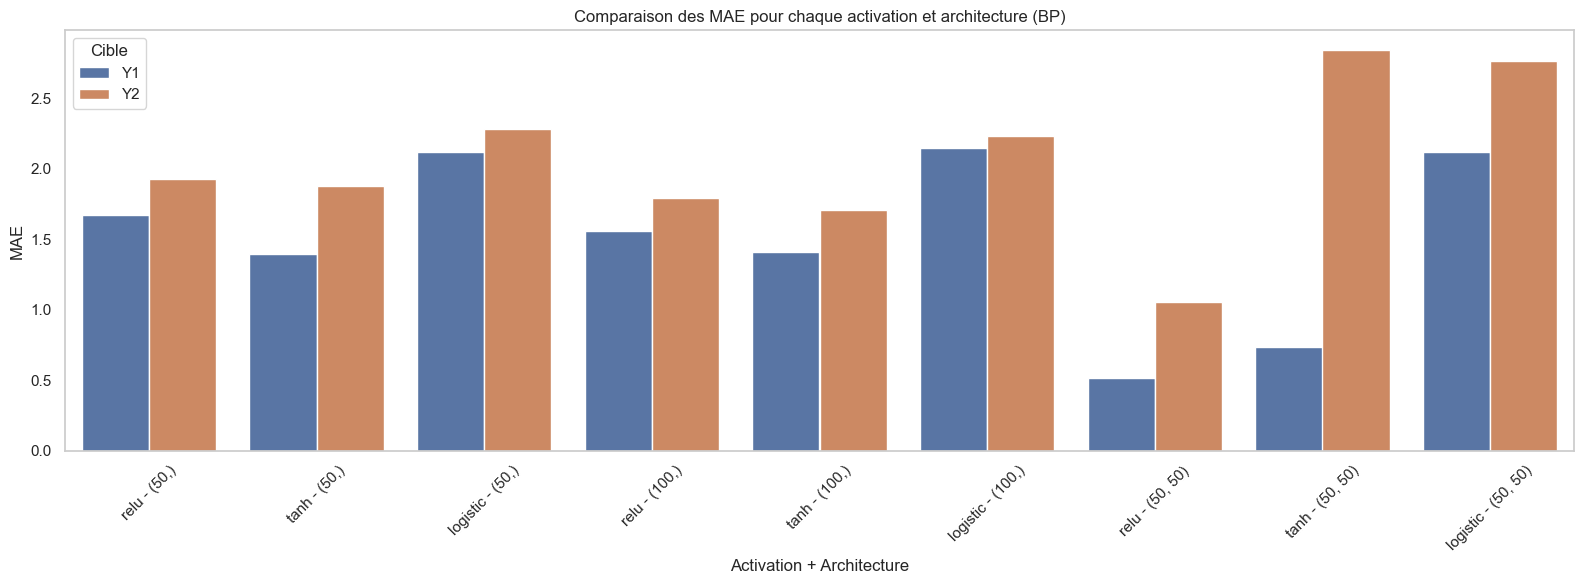

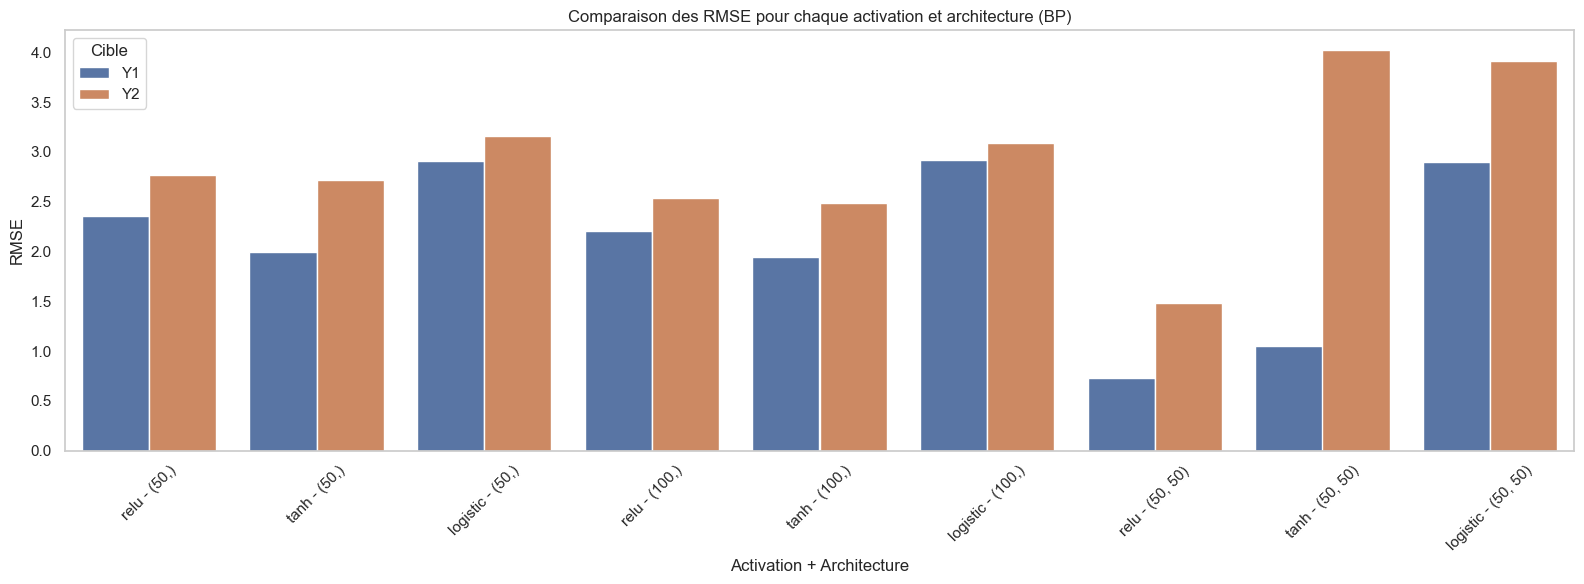

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- On va créer une nouvelle colonne "archi" pour l'affichage plus propre ---
bp_df['archi'] = bp_df['act'] + " - " + bp_df['arch'].astype(str)

# --- 1. Barplot MAE ---
plt.figure(figsize=(16, 6))
sns.barplot(data=bp_df, x='archi', y='MAE', hue='target')
plt.title('Comparaison des MAE pour chaque activation et architecture (BP)')
plt.xlabel('Activation + Architecture')
plt.ylabel('MAE')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title="Cible")
plt.tight_layout()
plt.show()

# --- 2. Barplot RMSE ---
plt.figure(figsize=(16, 6))
sns.barplot(data=bp_df, x='archi', y='RMSE', hue='target')
plt.title('Comparaison des RMSE pour chaque activation et architecture (BP)')
plt.xlabel('Activation + Architecture')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title="Cible")
plt.tight_layout()
plt.show()


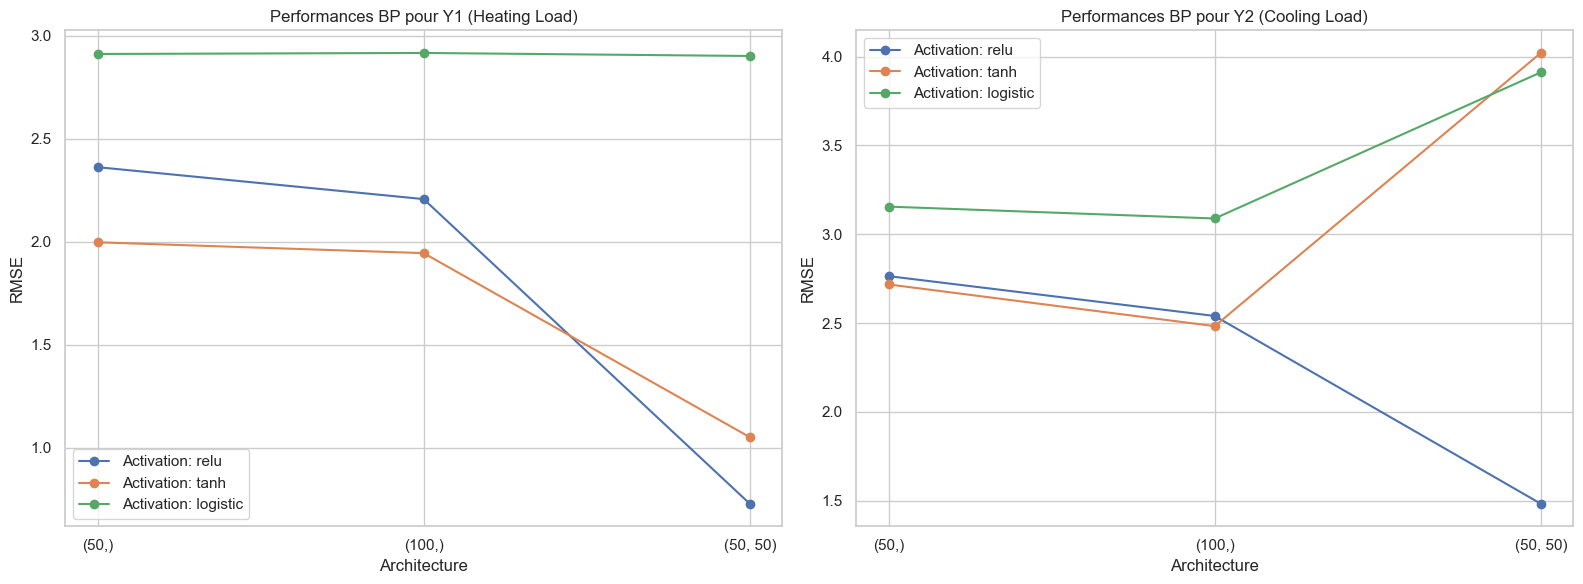

In [19]:
import matplotlib.pyplot as plt

# --- Créer deux sous-plots côte à côte ---
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# --- 1. Graphique pour Y1 ---
for act in activ_bp:
    subset = bp_df_y1[bp_df_y1['act'] == act]
    axs[0].plot(
        subset['arch'].astype(str), subset['RMSE'], 
        marker='o', label=f'Activation: {act}'
    )
axs[0].set_title('Performances BP pour Y1 (Heating Load)')
axs[0].set_xlabel('Architecture')
axs[0].set_ylabel('RMSE')
axs[0].legend()
axs[0].grid(True)

# --- 2. Graphique pour Y2 ---
for act in activ_bp:
    subset = bp_df_y2[bp_df_y2['act'] == act]
    axs[1].plot(
        subset['arch'].astype(str), subset['RMSE'], 
        marker='o', label=f'Activation: {act}'
    )
axs[1].set_title('Performances BP pour Y2 (Cooling Load)')
axs[1].set_xlabel('Architecture')
axs[1].set_ylabel('RMSE')
axs[1].legend()
axs[1].grid(True)

# --- Affichage final ---
plt.tight_layout()
plt.show()


## Graphique comparatif BP vs ELM pour Y1 et Y2🔥❄️

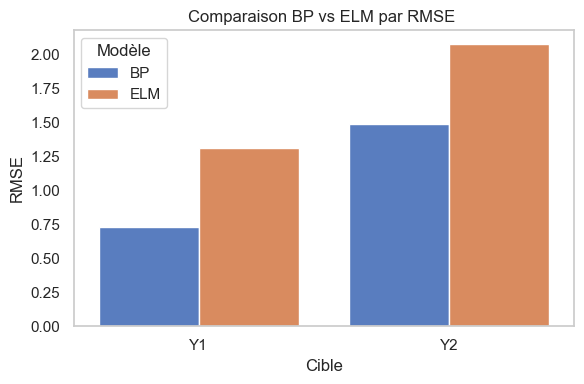

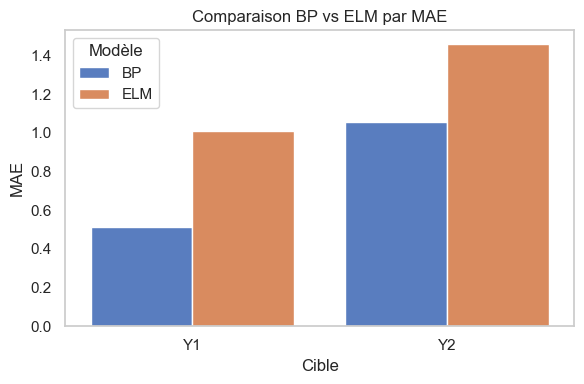


=== 🏆 Meilleur modèle par cible ===
Cible: Y1 --> Modèle: BP (Activation: relu, Neurones: (50, 50)) - RMSE: 0.7288, MAE: 0.5153, R2: 0.9948
Cible: Y2 --> Modèle: BP (Activation: relu, Neurones: (50, 50)) - RMSE: 1.4830, MAE: 1.0540, R2: 0.9756


In [20]:
# ----------------- 🛠️ Construction du DataFrame de comparaison -----------------

# Ajouter les colonnes 'model'
elm_df['model'] = 'ELM'
bp_df['model'] = 'BP'

# Sélectionner les meilleurs modèles pour chaque cible
best_bp_df = bp_df.loc[bp_df.groupby(['target'])['RMSE'].idxmin()]
best_elm_df = elm_df.loc[elm_df.groupby(['target'])['RMSE'].idxmin()]

# Concaténer BP et ELM
comparison_df = pd.concat([best_bp_df, best_elm_df])

# ------------------- 📊 Barplot Comparatif RMSE -------------------
plt.figure(figsize=(6,4))
sns.barplot(data=comparison_df, x='target', y='RMSE', hue='model', palette='muted')
plt.title('Comparaison BP vs ELM par RMSE ')
plt.ylabel('RMSE')
plt.xlabel('Cible')
plt.grid(axis='y')
plt.legend(title='Modèle')
plt.tight_layout()
plt.show()

# ------------------- 📊 Barplot Comparatif MAE -------------------
plt.figure(figsize=(6,4))
sns.barplot(data=comparison_df, x='target', y='MAE', hue='model', palette='muted')
plt.title('Comparaison BP vs ELM par MAE' )
plt.ylabel('MAE')
plt.xlabel('Cible')
plt.grid(axis='y')
plt.legend(title='Modèle')
plt.tight_layout()
plt.show()

# ------------------- 🏆 Détermination du modèle le plus performant -------------------

# Pour chaque cible, prendre le modèle avec le plus petit RMSE
best_models = comparison_df.loc[comparison_df.groupby('target')['RMSE'].idxmin()]

print("\n=== 🏆 Meilleur modèle par cible ===")
for idx, row in best_models.iterrows():
    print(f"Cible: {row['target']} --> Modèle: {row['model']} (Activation: {row['act']}, Neurones: {row['arch']}) - RMSE: {row['RMSE']:.4f}, MAE: {row['MAE']:.4f}, R2: {row['R2']:.4f}")


## Graphique Valeurs Réelles vs Prédictions

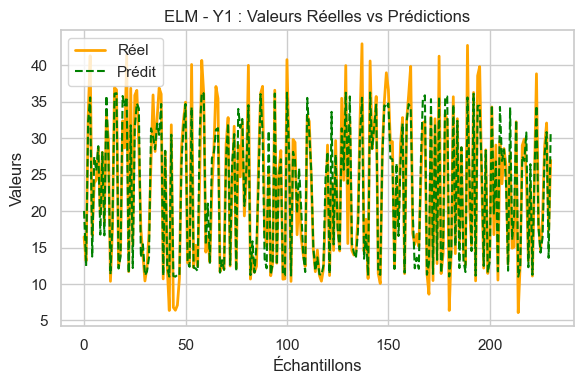

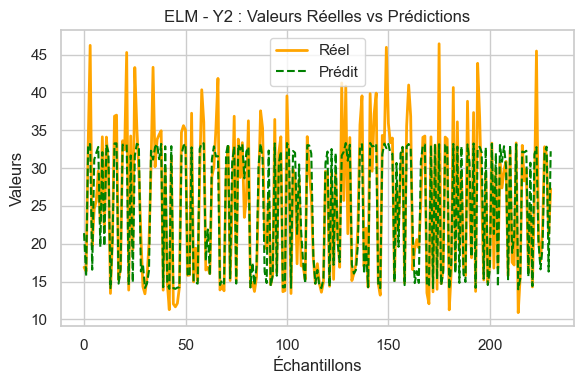

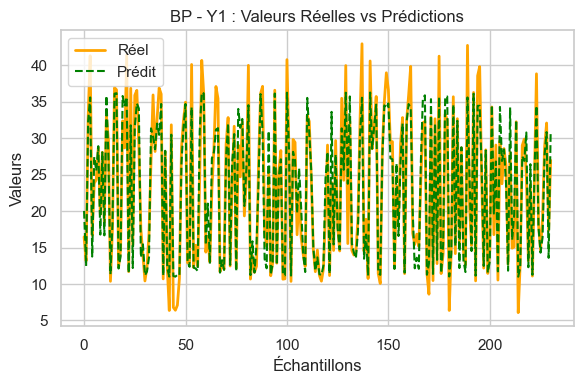

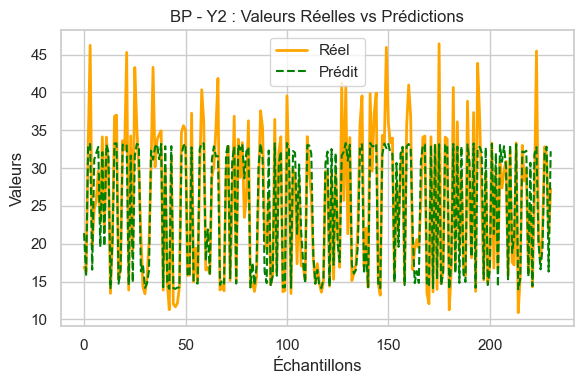

In [21]:
import matplotlib.pyplot as plt

def plot_real_vs_pred(y_true, y_pred, target_name, model_name):
 
    plt.figure(figsize=(6,4))
    plt.plot(y_true, label='Réel', color='orange', linewidth=2)
    plt.plot(y_pred, label='Prédit', color='green', linestyle='--')
    plt.title(f'{model_name} - {target_name} : Valeurs Réelles vs Prédictions')
    plt.xlabel('Échantillons')
    plt.ylabel('Valeurs')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ELM 
plot_real_vs_pred(y1_true, y1_pred, target_name='Y1', model_name='ELM')
plot_real_vs_pred(y2_true, y2_pred, target_name='Y2', model_name='ELM')
#BP
plot_real_vs_pred(y1_true, y1_pred, target_name='Y1', model_name='BP')
plot_real_vs_pred(y2_true, y2_pred, target_name='Y2', model_name='BP')



## Zoom sur les 100 premiers échantillons (courbes)

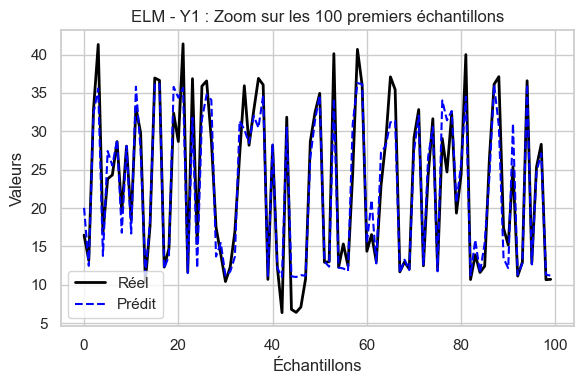

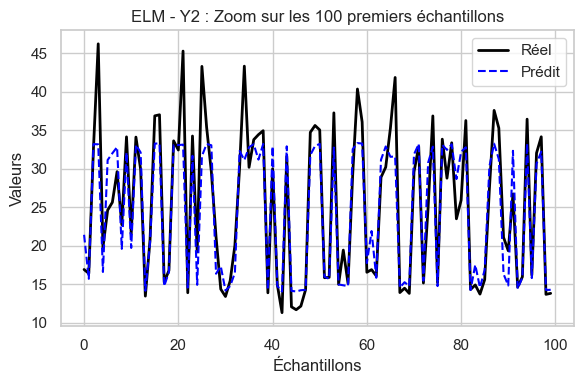

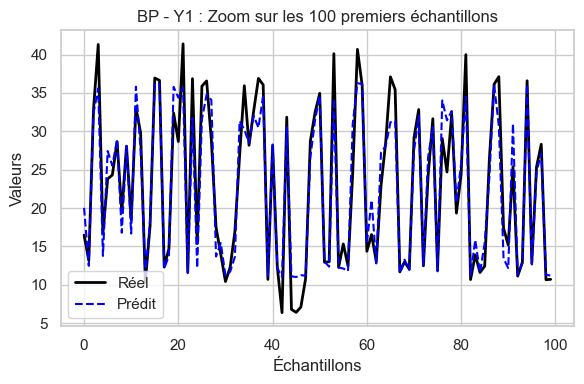

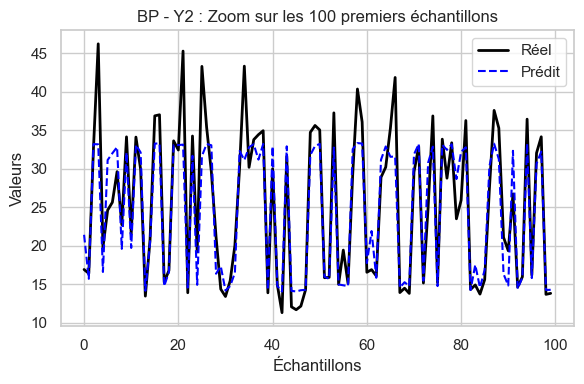

In [22]:
def plot_zoom_real_vs_pred(y_true, y_pred, target_name, model_name, n_samples=100):
    """
    Affiche uniquement les n_samples premiers points.
    """
    plt.figure(figsize=(6,4))
    plt.plot(y_true[:n_samples], label='Réel', color='black', linewidth=2)
    plt.plot(y_pred[:n_samples], label='Prédit', color='blue', linestyle='--')
    plt.title(f'{model_name} - {target_name} : Zoom sur les {n_samples} premiers échantillons')
    plt.xlabel('Échantillons')
    plt.ylabel('Valeurs')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 🔥 Exemple d'utilisation :
plot_zoom_real_vs_pred(y1_true, y1_pred, target_name='Y1', model_name='ELM')
plot_zoom_real_vs_pred(y2_true, y2_pred, target_name='Y2', model_name='ELM')
plot_zoom_real_vs_pred(y1_true, y1_pred, target_name='Y1', model_name='BP')
plot_zoom_real_vs_pred(y2_true, y2_pred, target_name='Y2', model_name='BP')


## Scatter Plot (nuage de points) Réel vs Prédit

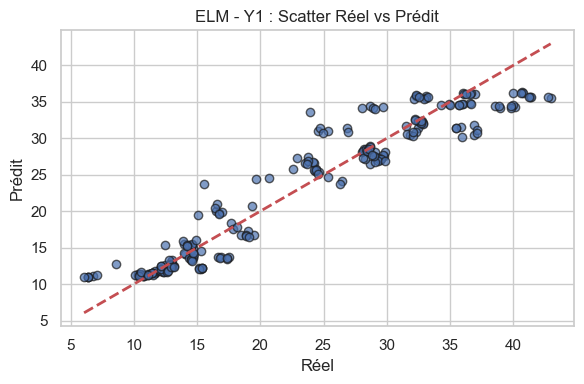

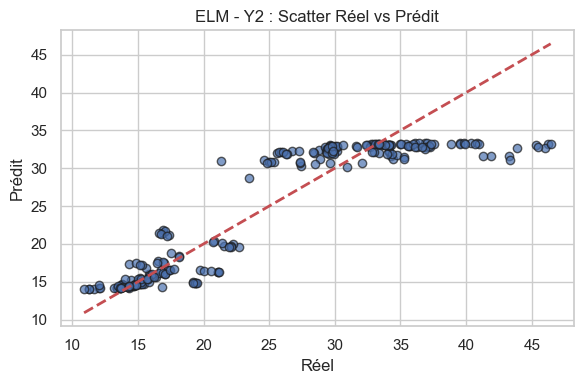

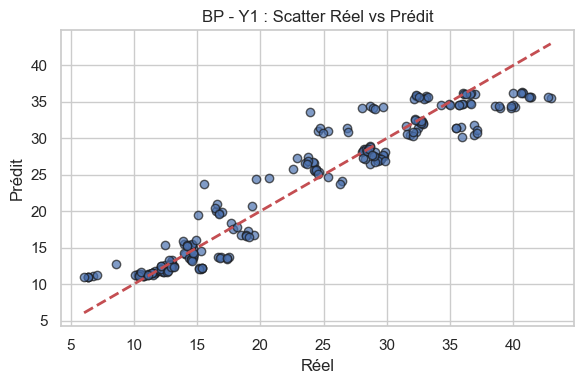

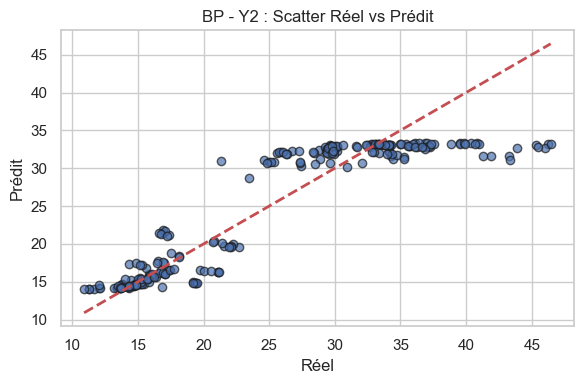

In [23]:
def scatter_real_vs_pred(y_true, y_pred, target_name, model_name):
    """
    Scatter plot pour comparer les vraies valeurs aux valeurs prédites.
    """
    plt.figure(figsize=(6,4))
    plt.scatter(y_true, y_pred, alpha=0.7, edgecolors='k')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)  # diagonale parfaite
    plt.title(f'{model_name} - {target_name} : Scatter Réel vs Prédit')
    plt.xlabel('Réel')
    plt.ylabel('Prédit')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 🔥 Exemple d'utilisation :
scatter_real_vs_pred(y1_true, y1_pred, target_name='Y1', model_name='ELM')
scatter_real_vs_pred(y2_true, y2_pred, target_name='Y2', model_name='ELM')
scatter_real_vs_pred(y1_true, y1_pred, target_name='Y1', model_name='BP')
scatter_real_vs_pred(y2_true, y2_pred, target_name='Y2', model_name='BP')


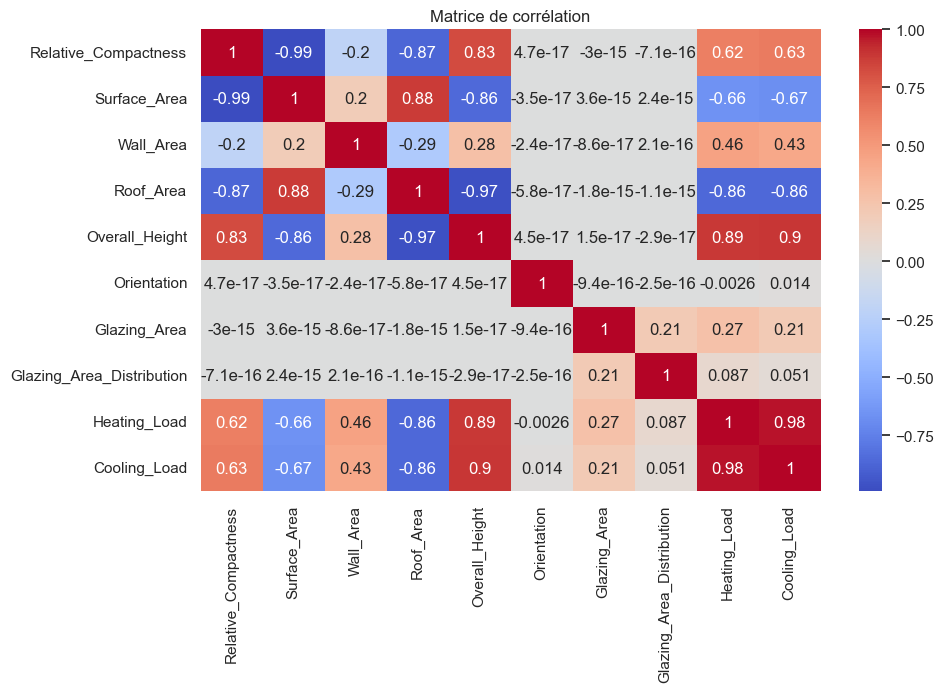


Corrélation avec Heating_Load :
 Heating_Load                 1.000000
Cooling_Load                 0.975862
Overall_Height               0.889430
Relative_Compactness         0.622272
Wall_Area                    0.455671
Glazing_Area                 0.269842
Glazing_Area_Distribution    0.087368
Orientation                 -0.002587
Surface_Area                -0.658120
Roof_Area                   -0.861828
Name: Heating_Load, dtype: float64

Corrélation avec Cooling_Load :
 Cooling_Load                 1.000000
Heating_Load                 0.975862
Overall_Height               0.895785
Relative_Compactness         0.634339
Wall_Area                    0.427117
Glazing_Area                 0.207505
Glazing_Area_Distribution    0.050525
Orientation                  0.014290
Surface_Area                -0.672999
Roof_Area                   -0.862547
Name: Cooling_Load, dtype: float64


NameError: name 'RandomForestRegressor' is not defined

In [24]:
# 3. Séparation des features et des cibles
X = df.drop(["Heating_Load", "Cooling_Load"], axis=1)
y_heating = df["Heating_Load"]
y_cooling = df["Cooling_Load"]

# 4. Analyse de Corrélation
correlation_matrix = df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

# Corrélation spécifique aux charges
print("\nCorrélation avec Heating_Load :\n", correlation_matrix["Heating_Load"].sort_values(ascending=False))
print("\nCorrélation avec Cooling_Load :\n", correlation_matrix["Cooling_Load"].sort_values(ascending=False))

# 5. Importance des Variables (Random Forest)

# Pour Heating Load
model_heating = RandomForestRegressor(random_state=42)
model_heating.fit(X, y1)

importances_heating = pd.Series(model_heating.feature_importances_, index=X.columns)
importances_heating = importances_heating.sort_values(ascending=True)

# Pour Cooling Load
model_cooling = RandomForestRegressor(random_state=42)
model_cooling.fit(X, y2)

importances_cooling = pd.Series(model_cooling.feature_importances_, index=X.columns)
importances_cooling = importances_cooling.sort_values(ascending=True)

# 6. Visualisation de l'importance des features

# Heating
plt.figure(figsize=(6,4))
importances_heating.plot(kind="barh", color="tomato")
plt.title("Importance des variables pour la charge de chauffage (Heating_Load)")
plt.xlabel("Importance")
plt.show()

# Cooling
plt.figure(figsize=(6,4))
importances_cooling.plot(kind="barh", color="skyblue")
plt.title("Importance des variables pour la charge de refroidissement (Cooling_Load)")
plt.xlabel("Importance")
plt.show()


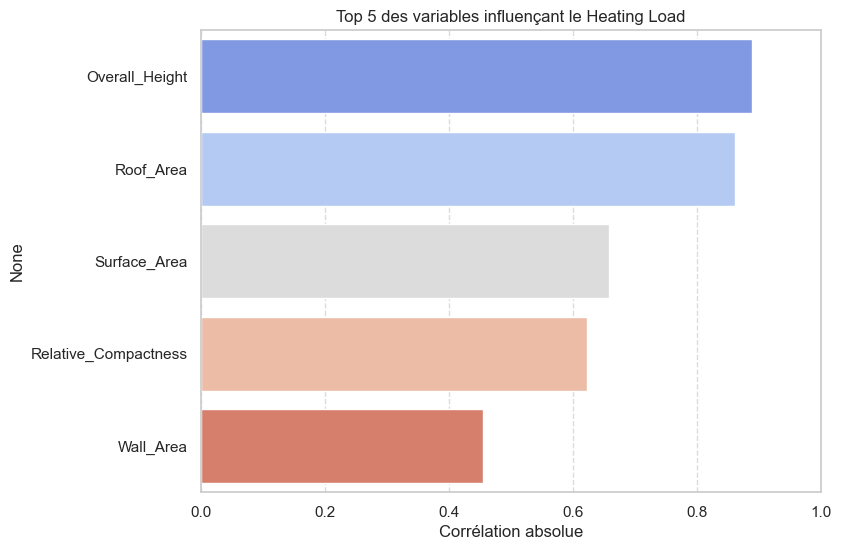

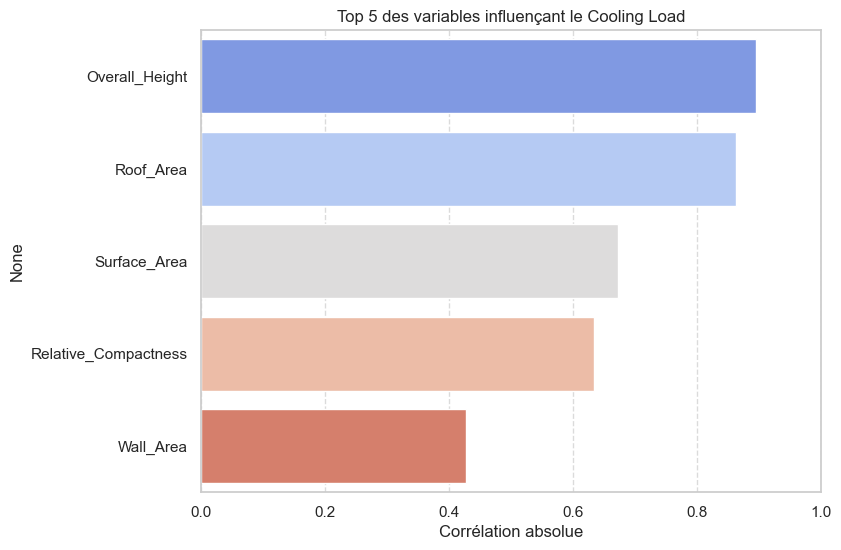

In [26]:
# Calcul de la corrélation
correlation_matrix = df.corr()

# Extraction des corrélations avec Heating_Load
correlations_sorted = correlation_matrix[['Heating_Load', 'Cooling_Load']].drop(['Heating_Load', 'Cooling_Load'])

# Pour Heating_Load : Top 5 variables
top5_heating = correlations_sorted['Heating_Load'].abs().sort_values(ascending=False).head(5)

# Affichage du graphique pour Heating_Load
plt.figure(figsize=(8,6))
sns.barplot(x=top5_heating.values, y=top5_heating.index, palette='coolwarm')
plt.title('Top 5 des variables influençant le Heating Load')
plt.xlabel('Corrélation absolue')
plt.xlim(0,1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Pour Cooling_Load : Top 5 variables
top5_cooling = correlations_sorted['Cooling_Load'].abs().sort_values(ascending=False).head(5)

# Affichage du graphique pour Cooling_Load
plt.figure(figsize=(8,6))
sns.barplot(x=top5_cooling.values, y=top5_cooling.index, palette='coolwarm')
plt.title('Top 5 des variables influençant le Cooling Load')
plt.xlabel('Corrélation absolue')
plt.xlim(0,1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()